In [65]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, LinearRing
import osmnx # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations

In [41]:
df = gpd.read_file("03.csv")

In [42]:
df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,geometry
0,2024-03-01 04:34:34.497000+00:00,2024-03-01 04:39:41.953000+00:00,307,615,Munkedamsveien,ved Haakon VIIs gate,59.9135227,10.7301061,452,Vippetangen vest,nærmest Rådhuset,59.903989,10.740627,None
1,2024-03-01 04:41:02.793000+00:00,2024-03-01 04:47:58.198000+00:00,415,444,AHO,langs Maridalsveien,59.925265,10.750462,526,Lille Grensen,Ved Akersgata,59.9138973,10.7423101,None
2,2024-03-01 04:45:50.903000+00:00,2024-03-01 04:52:54.592000+00:00,423,392,Sjøsiden 2 ved fontenen,to rader nærmest fontenen,59.910180852633516,10.751698750995615,464,Sukkerbiten,ved gangbroen,59.905124380703484,10.753763553726515,None
3,2024-03-01 04:46:58.214000+00:00,2024-03-01 04:53:27.653000+00:00,389,564,Oscars gate,ved Hegdehaugsveien,59.9224222,10.7272388,396,Kirkeristen,ved Torggata,59.91300035973293,10.746760585982287,None
4,2024-03-01 04:56:09.969000+00:00,2024-03-01 05:04:30.171000+00:00,500,421,Alexander Kiellands Plass,langs Maridalsveien,59.92806670615684,10.751202636819613,448,Oslo Plaza,ved rundkjøringen,59.91218291295141,10.7544337247013,None


In [46]:
cykel_start_points = gpd.points_from_xy(df.start_station_longitude, df.start_station_latitude)
cykel_end_points = gpd.points_from_xy(df.end_station_longitude, df.end_station_latitude)

In [55]:
lines = []
for i in range(len(cykel_start_points)):
    line = LineString([cykel_start_points[i], cykel_end_points[i]])
    lines.append(line)

In [125]:
cykel = gpd.GeoDataFrame(
    df, geometry = lines, crs = 4326)

In [126]:
cykel.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,geometry
0,2024-03-01 04:34:34.497000+00:00,2024-03-01 04:39:41.953000+00:00,307,615,Munkedamsveien,ved Haakon VIIs gate,59.9135227,10.7301061,452,Vippetangen vest,nærmest Rådhuset,59.903989,10.740627,"LINESTRING (10.73011 59.91352, 10.74063 59.90399)"
1,2024-03-01 04:41:02.793000+00:00,2024-03-01 04:47:58.198000+00:00,415,444,AHO,langs Maridalsveien,59.925265,10.750462,526,Lille Grensen,Ved Akersgata,59.9138973,10.7423101,"LINESTRING (10.75046 59.92527, 10.74231 59.91390)"
2,2024-03-01 04:45:50.903000+00:00,2024-03-01 04:52:54.592000+00:00,423,392,Sjøsiden 2 ved fontenen,to rader nærmest fontenen,59.910180852633516,10.751698750995615,464,Sukkerbiten,ved gangbroen,59.905124380703484,10.753763553726515,"LINESTRING (10.75170 59.91018, 10.75376 59.90512)"
3,2024-03-01 04:46:58.214000+00:00,2024-03-01 04:53:27.653000+00:00,389,564,Oscars gate,ved Hegdehaugsveien,59.9224222,10.7272388,396,Kirkeristen,ved Torggata,59.91300035973293,10.746760585982287,"LINESTRING (10.72724 59.92242, 10.74676 59.91300)"
4,2024-03-01 04:56:09.969000+00:00,2024-03-01 05:04:30.171000+00:00,500,421,Alexander Kiellands Plass,langs Maridalsveien,59.92806670615684,10.751202636819613,448,Oslo Plaza,ved rundkjøringen,59.91218291295141,10.7544337247013,"LINESTRING (10.75120 59.92807, 10.75443 59.91218)"


In [127]:
cykel.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [124]:
cykel.to_crs()

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

<AxesSubplot:>

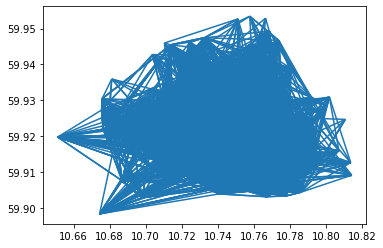

In [128]:
cykel.plot()

KeyboardInterrupt: 

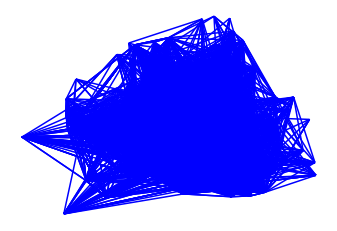

In [129]:
ax = cykel.plot(color="blue")
ax.set_axis_off()
cx.add_basemap(ax, crs=cykel.crs, source=cx.providers.CartoDB.Positron, zoom = 20);

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


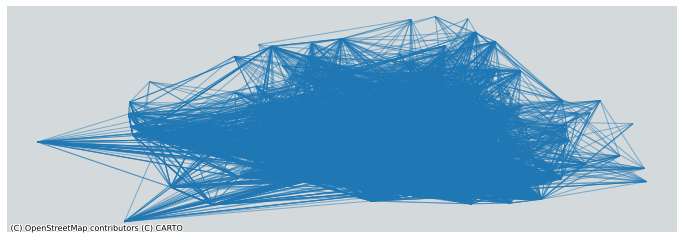

In [87]:
f, ax = plt.subplots(1, figsize=(12, 12))
cykel.plot(linewidth=1,alpha=0.5, ax=ax)
ax.set_axis_off()
cx.add_basemap(ax, crs=cykel.crs, source=cx.providers.CartoDB.Positron)

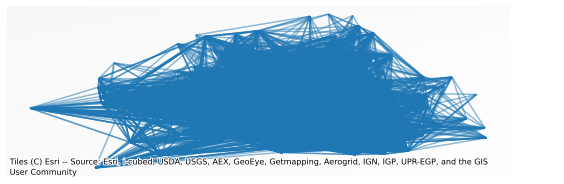

In [89]:
f, ax = plt.subplots(1, figsize=(9, 9))
cykel.plot(alpha=0.5, ax=ax)
cx.add_basemap(
    ax, 
    crs=cykel.crs,
    source=cx.providers.Esri.WorldImagery,
    zoom = 20
)
ax.set_axis_off()

In [130]:
cykel_long = cykel.loc[cykel['duration'] >= '980']

In [131]:
cykel_long

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,geometry
10,2024-03-01 05:18:59.607000+00:00,2024-03-01 05:20:39.300000+00:00,99,507,Jens Bjelkes Gate,ved Trondheimsveien,59.91914743024347,10.76412958416006,507,Jens Bjelkes Gate,ved Trondheimsveien,59.91914743024347,10.76412958416006,"LINESTRING (10.76413 59.91915, 10.76413 59.91915)"
153,2024-03-01 08:10:56.789000+00:00,2024-03-01 08:27:17.823000+00:00,981,453,Frogner Stadion,ved hovedinngangen,59.92753764682686,10.710262803261259,597,Fredensborg,ved rundkjøringen,59.920995,10.750358,"LINESTRING (10.71026 59.92754, 10.75036 59.92099)"
212,2024-03-01 10:59:03.572000+00:00,2024-03-01 11:15:37.437000+00:00,993,481,Rådhusgata,ved Kontraskjæret trikkestopp,59.910924,10.736215,470,St. Hanshaugen park nord,krysset Colletts gt / Geitmyrsveien,59.92979845370007,10.743540765932096,"LINESTRING (10.73621 59.91092, 10.74354 59.92980)"
404,2024-03-01 15:23:09.910000+00:00,2024-03-01 15:24:49.649000+00:00,99,417,Uranienborgparken,langs Holtegata,59.922485,10.720896,417,Uranienborgparken,langs Holtegata,59.922485,10.720896,"LINESTRING (10.72090 59.92249, 10.72090 59.92249)"
471,2024-03-01 16:19:03.704000+00:00,2024-03-01 16:20:43.402000+00:00,99,2358,Aker Brygge 3 mot Fergene,ved bryggen,59.91087115068967,10.729828757277915,2280,Klingenberggata,By Olav V street,59.913150534075015,10.732281291700133,"LINESTRING (10.72983 59.91087, 10.73228 59.91315)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,2024-03-31 17:51:51.741000+00:00,2024-03-31 17:53:31.537000+00:00,99,2330,Stjerneplassen,Krysset Skippergata Storgata,59.91323316606503,10.749958763650312,2330,Stjerneplassen,Krysset Skippergata Storgata,59.91323316606503,10.749958763650312,"LINESTRING (10.74996 59.91323, 10.74996 59.91323)"
22098,2024-03-31 18:30:31.491000+00:00,2024-03-31 18:46:54.335000+00:00,982,558,Dokkveien,ved Støperigata,59.910974,10.7277001,500,Anker Hotel,langs Storgata,59.9172794,10.7581553,"LINESTRING (10.72770 59.91097, 10.75816 59.91728)"
22101,2024-03-31 18:30:45.886000+00:00,2024-03-31 18:47:24.676000+00:00,998,558,Dokkveien,ved Støperigata,59.910974,10.7277001,500,Anker Hotel,langs Storgata,59.9172794,10.7581553,"LINESTRING (10.72770 59.91097, 10.75816 59.91728)"
22125,2024-03-31 18:54:24.835000+00:00,2024-03-31 19:11:01.541000+00:00,996,516,Finnmarksgata,ved Telavåggata,59.922839,10.775658,744,Hallénparken,ved Vogts gate,59.9315302,10.762169,"LINESTRING (10.77566 59.92284, 10.76217 59.93153)"


KeyboardInterrupt: 

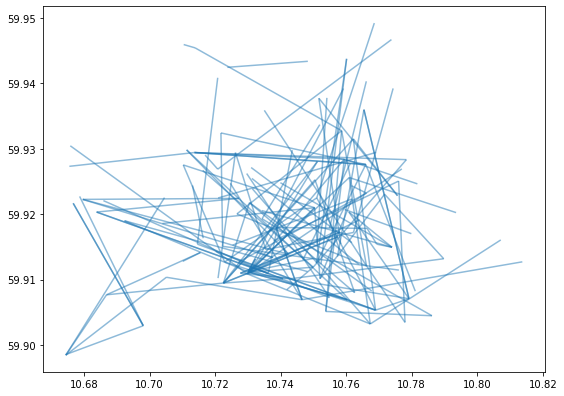

In [133]:
f, ax = plt.subplots(1, figsize=(9, 9))
cykel_long.plot(alpha=0.5, ax=ax)
cx.add_basemap(
    ax, 
    crs=cykel_long.crs,
    source=cx.providers.Esri.WorldImagery
)
ax.set_axis_off()

In [132]:
print(cykel_long.crs)

epsg:4326


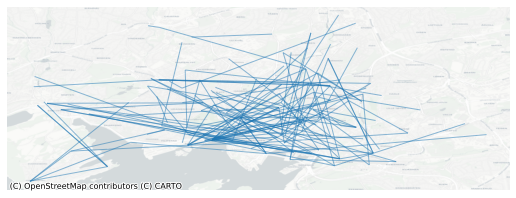

In [135]:
f, ax = plt.subplots(1, figsize=(9, 9))
cykel_long.plot(linewidth=1,alpha=0.5, ax=ax)
ax.set_axis_off()
cx.add_basemap(ax, crs=cykel_long.crs, source=cx.providers.CartoDB.Positron)

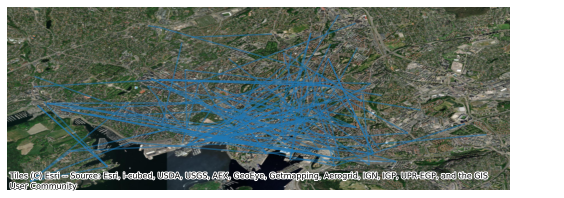

In [137]:
f, ax = plt.subplots(1, figsize=(9, 9))
cykel_long.plot(alpha=0.5, ax=ax)
cx.add_basemap(
    ax, 
    crs=cykel_long.crs,
    source=cx.providers.Esri.WorldImagery
)
ax.set_axis_off()